In [47]:
# this extracts data to run the line by line code for simulation of share purchase

In [48]:

import pandas as pd
import matplotlib.pyplot as plt
from share_data import share_sim_data as data
from share_data import get_portfolio_shares as portfolio
import scipy.stats as syst
import pylab
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import chi2

In [49]:
share_focused='hfck'
df=data()
share_list=portfolio()

Processing shares:   0%|          | 0/13 [00:00<?, ?share/s]

Processing shares: 100%|██████████| 13/13 [00:24<00:00,  1.92s/share]


In [50]:
share_name=share_list[5]

In [51]:
#missing vals
df.isna().sum()


hfck       0
sbic       0
scbk       0
cic        0
imh        0
bkg     1312
ncba       0
eqty       0
kcb        0
ctum       0
coop       0
brit       0
absa       0
dtype: int64

In [52]:
df.bkg=df.bkg.fillna(value=df.bkg.mean())

In [53]:
df.isna().sum()

hfck    0
sbic    0
scbk    0
cic     0
imh     0
bkg     0
ncba    0
eqty    0
kcb     0
ctum    0
coop    0
brit    0
absa    0
dtype: int64

In [54]:
df.head(10)


,hfck,sbic,scbk,cic,imh,bkg,ncba,eqty,kcb,ctum,coop,brit,absa
Date,,,,,,,,,,,,,
2013-08-22,25.25,72.5,294.0,4.90,89.5,27.040119,57.0,34.50,44.75,25.25,16.50,8.20,17.50
2013-08-23,25.00,72.0,294.0,4.90,88.0,27.040119,57.5,34.25,45.00,25.25,16.40,8.20,17.45
2013-08-26,25.25,72.0,294.0,4.85,88.0,27.040119,57.5,34.50,44.75,25.00,16.15,8.25,17.45
2013-08-27,25.00,72.0,292.0,4.80,86.0,27.040119,57.5,34.00,44.50,23.50,16.15,8.05,17.50
2013-08-28,24.50,71.5,292.0,4.70,85.0,27.040119,57.5,33.25,43.00,23.25,16.00,7.90,17.45
2013-08-29,24.50,68.5,292.0,4.70,88.5,27.040119,57.5,32.75,42.75,24.00,16.15,8.00,17.30
2013-08-30,24.00,68.5,294.0,4.70,85.0,27.040119,57.0,32.50,42.00,24.25,16.05,8.15,17.05
2013-09-02,24.00,69.0,292.0,4.55,85.0,27.040119,57.5,32.75,42.00,23.50,15.95,8.15,17.10
2013-09-03,24.25,68.0,293.0,4.50,85.0,27.040119,57.5,33.75,42.25,23.75,15.75,8.10,17.05


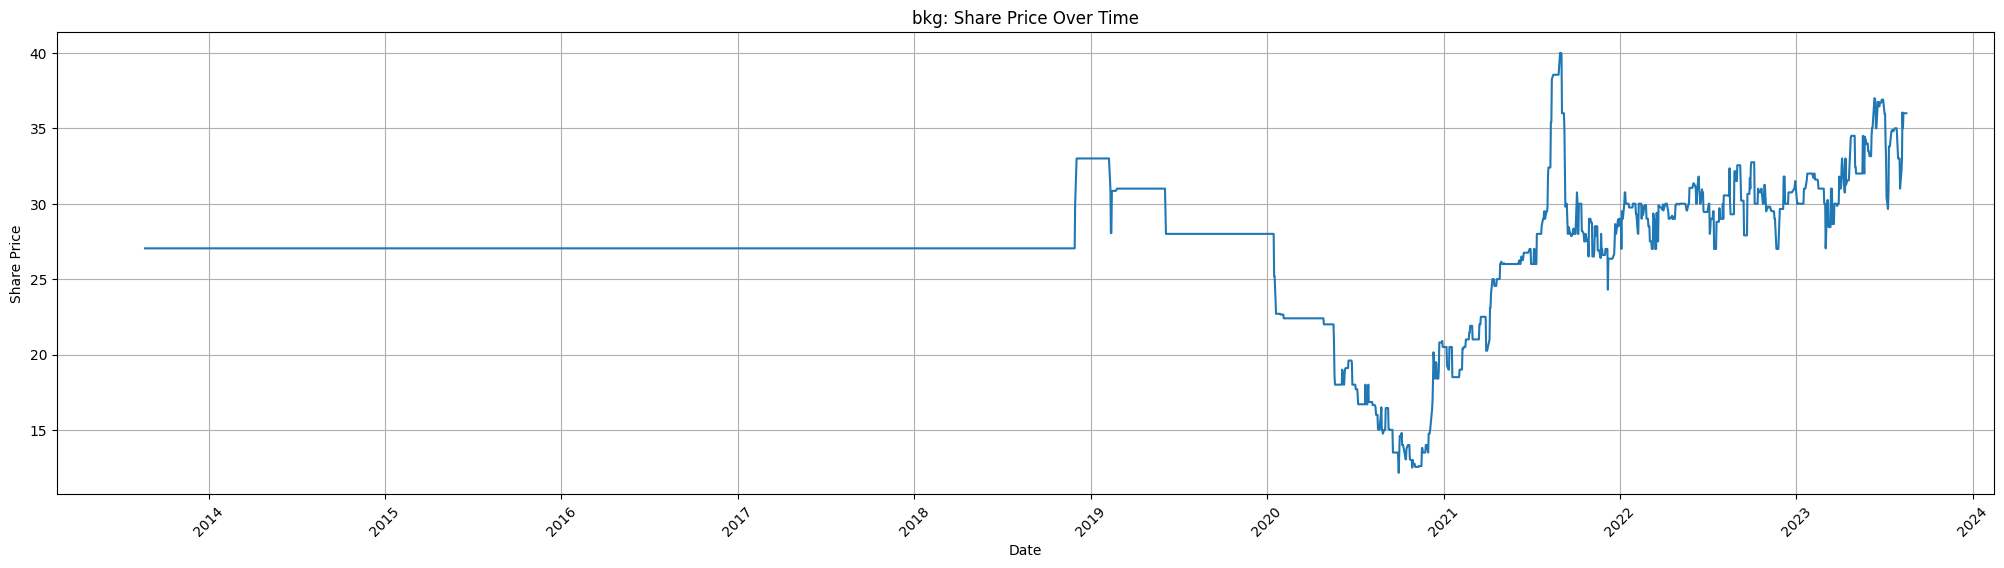

In [55]:
plt.figure(figsize=(25, 6))
plt.plot(df.index, df[share_name], linestyle='-')
plt.xlabel('Date')
plt.ylabel('Share Price')
plt.title(f'{share_name}: Share Price Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

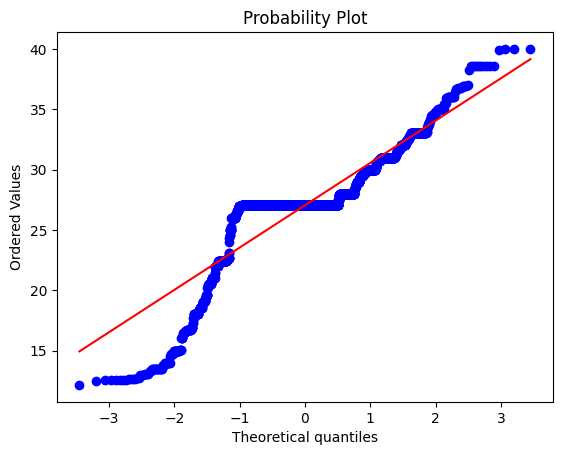

In [56]:
syst.probplot(df[share_name],plot=pylab)
pylab.show()

In [57]:
df_tseries=df.asfreq('b')

In [58]:
df_tseries.sample(10)

,hfck,sbic,scbk,cic,imh,bkg,ncba,eqty,kcb,ctum,coop,brit,absa
Date,,,,,,,,,,,,,
2018-06-07,7.95,94.50,203.00,4.55,115.00,27.040119,35.00,49.25,48.75,39.00,17.50,13.95,11.85
2023-03-30,3.61,109.00,169.50,2.11,21.00,30.000000,35.95,44.60,35.00,8.72,13.00,4.57,12.65
2020-12-11,3.08,75.25,150.00,2.06,46.00,20.150000,23.30,35.00,37.00,15.75,11.70,7.20,9.56
2022-04-20,3.01,105.00,146.25,2.08,20.30,29.000000,26.15,49.65,42.90,12.25,12.85,6.76,12.55
2019-07-16,4.20,98.00,196.50,3.52,53.00,28.000000,30.55,40.00,39.40,32.50,12.05,7.50,10.30
2021-11-09,4.17,87.00,129.25,2.36,21.80,27.000000,24.15,51.75,44.40,17.70,12.40,7.54,10.40
2019-06-21,4.29,100.00,192.50,3.50,54.00,28.000000,30.70,39.45,39.10,32.45,12.10,8.28,10.40
2019-07-31,4.10,98.50,195.75,3.21,51.75,28.000000,29.60,40.20,40.00,32.50,11.95,7.88,10.65
2015-11-16,21.50,87.00,221.00,6.30,99.00,27.040119,42.00,41.00,40.25,44.50,17.95,15.15,13.75


In [59]:
df_tseries.isna().sum()

hfck    120
sbic    120
scbk    120
cic     120
imh     120
bkg     120
ncba    120
eqty    120
kcb     120
ctum    120
coop    120
brit    120
absa    120
dtype: int64

In [60]:
#fill in missing values
for name in share_list:
    df_tseries[name]=df_tseries[name].fillna(method='bfill')

In [61]:
df_tseries.isna().sum()

hfck    0
sbic    0
scbk    0
cic     0
imh     0
bkg     0
ncba    0
eqty    0
kcb     0
ctum    0
coop    0
brit    0
absa    0
dtype: int64

In [62]:
def get_time_series(share):
    for name in share_list:
        if name==share:
            df_tseries[f'mkt_price_{name}']=df_tseries[name]
        else:
            del df_tseries[name]
    return df_tseries



In [63]:
size=int(len(df_tseries.index)*0.8)
print(len(df_tseries.index))
print(size)


2606
2084


In [64]:
df_tseries

,hfck,sbic,scbk,cic,imh,bkg,ncba,eqty,kcb,ctum,coop,brit,absa
Date,,,,,,,,,,,,,
2013-08-22,25.25,72.50,294.00,4.90,89.50,27.040119,57.00,34.50,44.75,25.25,16.50,8.20,17.50
2013-08-23,25.00,72.00,294.00,4.90,88.00,27.040119,57.50,34.25,45.00,25.25,16.40,8.20,17.45
2013-08-26,25.25,72.00,294.00,4.85,88.00,27.040119,57.50,34.50,44.75,25.00,16.15,8.25,17.45
2013-08-27,25.00,72.00,292.00,4.80,86.00,27.040119,57.50,34.00,44.50,23.50,16.15,8.05,17.50
2013-08-28,24.50,71.50,292.00,4.70,85.00,27.040119,57.50,33.25,43.00,23.25,16.00,7.90,17.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-11,4.97,120.00,164.75,2.10,19.00,36.000000,39.25,41.00,28.90,9.28,11.95,5.14,12.45
2023-08-14,4.57,121.25,165.50,2.17,18.55,36.000000,39.00,41.00,28.50,9.16,11.75,4.99,12.20
2023-08-15,4.81,121.50,163.50,2.04,18.95,36.000000,38.70,40.70,28.10,9.00,11.70,4.95,12.15


In [65]:
series=get_time_series(share_focused)
del series[share_focused]

In [66]:
series[f'ret_{share_focused}']=series[f'mkt_price_{share_focused}'].pct_change(1).mul(100)

In [67]:
del series[f'mkt_price_{share_focused}']

In [68]:
series=series[1:]
series

,ret_hfck
Date,
2013-08-23,-0.990099
2013-08-26,1.000000
2013-08-27,-0.990099
2013-08-28,-2.000000
2013-08-29,0.000000
...,...
2023-08-11,1.428571
2023-08-14,-8.048290
2023-08-15,5.251641


In [69]:
sts.adfuller(series)

(-15.684746457038393,
 1.4580676614888632e-28,
 9,
 2595,
 {'1%': -3.4328724587241686,
  '5%': -2.862654426799674,
  '10%': -2.567363249505311},
 12375.773932262378)

In [70]:
#accept the null hypothesis: No stationarity in the hfck data

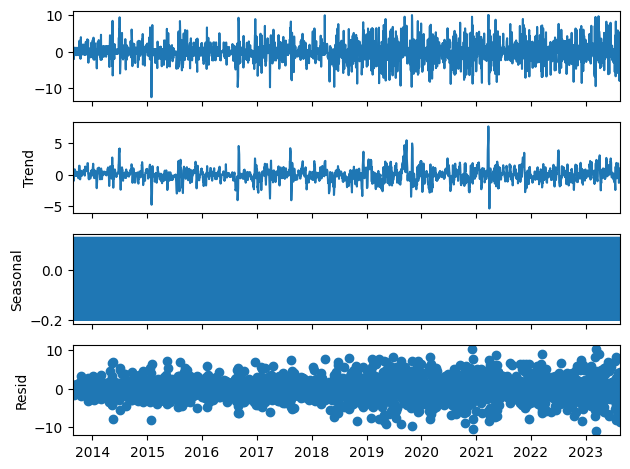

In [71]:
s_dec_add=seasonal_decompose(series,model='additive')
s_dec_add.plot()
plt.show()

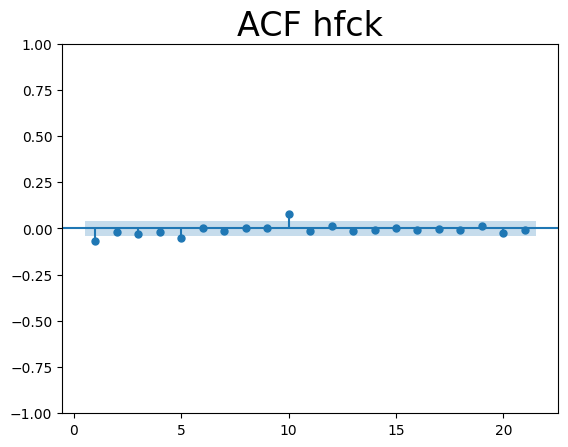

In [72]:
sgt.plot_pacf(series,lags=21,zero=False)
plt.title(f"ACF {share_focused}",size=24)
plt.show()

In [73]:
df_train=series.iloc[:size]
df_test=series.iloc[size:]

In [74]:
model_arima1=ARIMA(df_train,order=(4,1,5))
results_arima=model_arima1.fit()
model_arima2=ARIMA(df_train,order=(2,1,4))
results_arima2=model_arima2.fit()

results_arima.summary()

d:\ndungi\shares\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               ret_hfck   No. Observations:                 2084
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -4935.044
Date:                Mon, 21 Aug 2023   AIC                           9890.089
Time:                        11:55:39   BIC                           9946.505
Sample:                    08-23-2013   HQIC                          9910.761
                         - 08-18-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9469      0.085    -22.861      0.000      -2.114      -1.780
ar.L2         -2.0729      0.101    -20.524      0.000      -2.271      -1.875
ar.L3         -1.8268      0.103    -17.819      0.000      -2.028      -1.626
ar.L4         -0.8016      0.076    -10.502      0.000      -0.951      -0.652
ma.L1          0.9343      0.086     10.820      0.000       0.765       1.104
ma.L2          0.1495      0.064      2.328      0.020       0.024       0.275
ma.L3         -0.2275      0.069     -3.301      0.001      -0.363      -0.092
ma.L4         -1.0242      0.063    -16.251      0.000      -1.148      -0.901
ma.L5         -0.8316      0.073    -11.378      0.000      -0.975      -0.688
sigma2         6.8443      0.253     27.076      0.000       6.349       7.340
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               640.20
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               2.56   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\HP\AppData\Local\Temp\ipykernel_2580\3740636139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['retn_res']=results_arima.resid


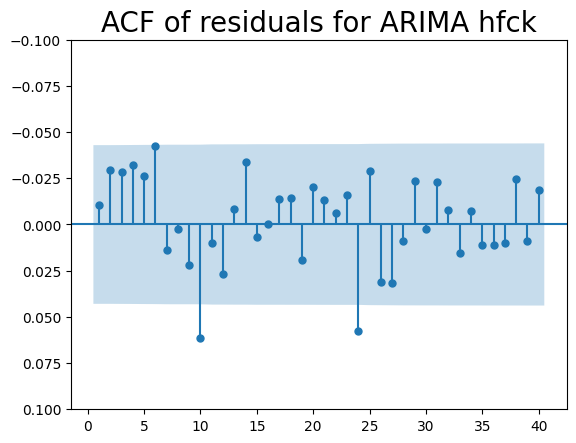

In [75]:
#ploting residuals
df_train['retn_res']=results_arima.resid
sgt.plot_acf(df_train.retn_res,zero=False,lags=40)
plt.ylim(0.1, -0.1)
plt.title(f'ACF of residuals for ARIMA {share_focused}', size=20)
plt.show()


In [83]:
print('arima \t ll=', results_arima.llf, '\t AIC=', results_arima.aic)
print('arima2 \t ll=', results_arima2.llf, '\t AIC=', results_arima2.aic)


arima 	 ll= -4935.044482748468 	 AIC= 9890.088965496936
arima2 	 ll= -4935.604524875328 	 AIC= 9885.209049750656


In [77]:
def LLR_test(mod1,mod2,DF=1):
    l1=mod1.fit().llf
    l2=mod2.fit().llf
    LR=(2*(l2-l1))
    p=chi2.sf(LR,DF).round(3)
    return p

In [81]:
print('\n LLR test p-value=' + str(LLR_test(model_arima2,model_arima1)))

d:\ndungi\shares\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



 LLR test p-value=0.29
